In [1]:
import pandas as pd
import numpy as np
import json

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%load_ext autoreload
%autoreload 2

pd.set_option("max_rows",100)
pd.set_option("max_columns",120)

In [2]:
path = "../output/word_score_attack_results__40_4_0_2022-04-02 00:19:41.json"
with open(path) as f:
    results_40_4_0 = json.load(fp=f)


In [3]:
data_40_4_0 = pd.read_csv("../output/word_score_attack_data__40_4_0_2022-04-02 00:19:41.csv")
data_40_4_0.shape
data_40_4_0.head()

(500, 9)

,attack_status,ground_truth,orig_prediction,attacked_token,perturbed_token,num_queries,original_text,perturbed_text,perturbed_preds
0,Successful,1,1.0,real,ral,53.0,There must have been some interesting conversa...,there must have been some interesting conversa...,0.0
1,Failed,1,1.0,NaN,NaN,160.0,Cooley High is such a great film that even wit...,NaN,1.0
2,Failed,0,0.0,NaN,NaN,160.0,Rise of the Undead starts as some huge nuclear...,NaN,0.0
3,Skipped,0,1.0,NaN,NaN,NaN,I remember seeing a clip of this movie on HBO ...,NaN,1.0
4,Successful,0,0.0,least,lerast,19.0,"Okay,I had watched this movie when I was very ...","oaky,i had watched this movie when i was very ...",1.0


In [4]:
results_40_4_0

{'total_attacks': 500,
 'avg_n_queries': 57.83,
 'successful_attacks': 237,
 'failed_attacks': 203,
 'skipped_attacks': 60,
 'attack_success_rate': 54.0,
 'orig_accuracy': 88.0,
 'attack_accuracy': 40.6}

In [5]:
data_40_4_0.num_queries.mean()
data_40_4_0.attack_status.value_counts()

57.83409090909091

Successful    237
Failed        203
Skipped        60
Name: attack_status, dtype: int64

In [6]:
100*data_40_4_0.loc[ data_40_4_0.attack_status=='Failed'].shape[0]/500

40.6

In [7]:
path = "../output/word_score_attack_"
def read_results(experiment):
    result_file = path+"results__"+experiment+".json"
    csv_file = path+"data__"+experiment+".csv"
    
    with open(result_file) as f:
        results = json.load(fp=f)
    data = pd.read_csv(csv_file)
    return results, data

def accuracy_at_i_perturbations(df, max_tokens_to_query, max_tries_per_token):
    acc_at_i = np.zeros([max_tokens_to_query+1])
    for i in range(1,max_tokens_to_query+1):
        n_failed = df.loc[(df.attack_status=="Failed") | (df.num_queries>(i)*max_tries_per_token)].shape[0]
        acc_at_i[i] = np.round(100*n_failed/df.shape[0],2)
    return acc_at_i   

In [8]:
runs = [ "40_1_0_2022-04-02 15:29:06", "40_2_0_2022-04-02 18:58:19", "40_3_0_2022-04-02 20:53:23", "40_4_0_2022-04-02 00:19:41" ]


In [9]:
results = []
accuracies = {}
for run in runs:
    result, data = read_results(run)
    results.append(result)
    params = run.split("_")
    print(params)
    max_tries_per_token = int(params[1])
    acc= accuracy_at_i_perturbations(data, 40, max_tries_per_token)
    accuracies[max_tries_per_token] = acc

['40', '1', '0', '2022-04-02 15:29:06']
['40', '2', '0', '2022-04-02 18:58:19']
['40', '3', '0', '2022-04-02 20:53:23']
['40', '4', '0', '2022-04-02 00:19:41']


In [10]:
results

[{'total_attacks': 500,
  'avg_n_queries': 17.78,
  'successful_attacks': 154,
  'failed_attacks': 286,
  'skipped_attacks': 60,
  'attack_success_rate': 35.0,
  'orig_accuracy': 88.0,
  'attack_accuracy': 57.2},
 {'total_attacks': 500,
  'avg_n_queries': 32.46,
  'successful_attacks': 185,
  'failed_attacks': 255,
  'skipped_attacks': 60,
  'attack_success_rate': 42.0,
  'orig_accuracy': 88.0,
  'attack_accuracy': 51.0},
 {'total_attacks': 500,
  'avg_n_queries': 45.59,
  'successful_attacks': 219,
  'failed_attacks': 221,
  'skipped_attacks': 60,
  'attack_success_rate': 50.0,
  'orig_accuracy': 88.0,
  'attack_accuracy': 44.2},
 {'total_attacks': 500,
  'avg_n_queries': 57.83,
  'successful_attacks': 237,
  'failed_attacks': 203,
  'skipped_attacks': 60,
  'attack_success_rate': 54.0,
  'orig_accuracy': 88.0,
  'attack_accuracy': 40.6}]

In [11]:
accuracies

{1: array([ 0. , 85.4, 84.2, 82.4, 81. , 79.4, 77.4, 76. , 74.2, 74. , 72. ,
        70.2, 69.2, 67.2, 65.8, 64.6, 63.8, 63.4, 61.8, 61.4, 60.8, 59.8,
        59.2, 59.2, 59.2, 59. , 58.8, 58.8, 58.8, 58.6, 58.2, 58.2, 58.2,
        58.2, 58.2, 58. , 57.8, 57.2, 57.2, 57.2, 57.2]),
 2: array([ 0. , 84.4, 81.8, 79.8, 77.4, 74.4, 72.6, 71. , 68.2, 67. , 65.8,
        63.2, 61.6, 60.2, 59.6, 58.6, 58.2, 57.6, 56.6, 55. , 54.6, 54.2,
        53.4, 53.2, 53.2, 52.8, 52.4, 52.4, 52.2, 52.2, 52. , 51.8, 51.8,
        51.6, 51.4, 51.2, 51.2, 51.2, 51.2, 51. , 51. ]),
 3: array([ 0. , 84.2, 81.2, 79.2, 76.4, 73. , 70.8, 68.6, 66.8, 65. , 62. ,
        58.6, 56.8, 54.6, 53.8, 52.2, 51.8, 51.4, 49.8, 48.6, 48. , 47.4,
        46.6, 46.2, 46.2, 46.2, 46.2, 46.2, 45.6, 45.6, 45.2, 45. , 44.8,
        44.8, 44.6, 44.6, 44.4, 44.4, 44.2, 44.2, 44.2]),
 4: array([ 0. , 83.2, 80.4, 76.4, 73.6, 70.6, 69. , 66.6, 63.4, 62.2, 60.8,
        57.4, 55.2, 52. , 50.8, 48.8, 48. , 46.6, 46.4, 45.4, 44.8, 44.4,


In [52]:
df  =pd.DataFrame.from_dict(accuracies)

In [86]:

# settings
#plt.style.use('seaborn')
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams["figure.figsize"] = (8, 5)
#sns.set(font_scale=1.5, rc={'text.usetex' : False})
#sns.set(font_scale=1,grid=None)
#plt.style.use('grayscale')
plt.rcParams['font.size'] = '16'


Text(0.5, 0, 'max_tokens_to_perturb')

Text(0, 0.5, 'model_accuracy (%)')

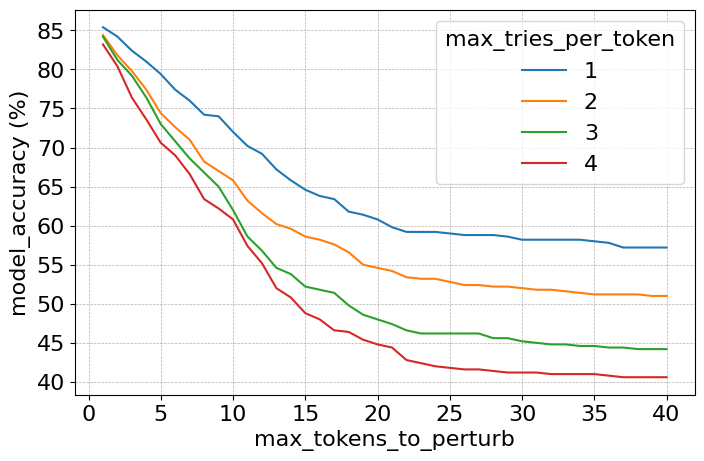

In [87]:

ax = df[1:].plot()
ax.set_xlabel(r'max_tokens_to_perturb')
ax.set_ylabel(r'model_accuracy (%)')
ax.legend()
#ax.legend(bbox_to_anchor=(1.1, 1.0))
ax.get_legend().set_title("max_tries_per_token")
ax.set_yticks(np.arange(40, 90, 5))
plt.grid(linestyle = '--', linewidth = 0.5)
plt.savefig('../images/word_score_accuracies.pdf', dpi=1200)
plt.show()
